## Project Name: EPL Insights & Exploring Players Segmentation with KMeans

The main aim of this project is to employ KMeans clustering and exploratory data analysis (EDA) techniques to gain insights into player and club performance and behavior within the English Premier League (EPL) during the 2020-21 season.

**The dataset can be downloaded from this link**

https://www.kaggle.com/datasets/rajatrc1705/english-premier-league202021/data

## Steps 

 1. Importing Necessary Library and Reading the Data
 2. Exploratory Data Analysis and Visualisations
 3. Featuring Engineering with Principal Component Analysis PCA
 4. KMeans Clustering

## 1. Importing Necessary Libraries

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "3"

 **Loading the Dataset**

In [3]:
df = pd.read_csv("EPL_20_21.csv")

In [4]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


## 2. Exploratory Data Analysis

In [5]:
# computing basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

### **Inference:**

- The dataset contains 532 rows and 17 columns
- 4 columns are Categorical while 13 columns are Numerical

In [6]:
# Getttng the attributes of the data
df.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

### Inference:

**Name** Name of the player

**Cub** The club of the player

**Nationality** The players nationality

**Position** Player position. The positions in this dataset are, FW - Forward, MF - Midfield, DF - Defensive, GK - Goalkeeper

**Age** The age of the player

**Matches** The total matches played by the player

**Starts**	The number of times the player was named in the starting 11 by the manager.

**Mins**	The number of minutes played by the player.

**Goals**	The number of Goals scored by the player.

**Assists**	The number of times the player has assisted other player in scoring the goal.

**Passes_Attempted** The number of passes attempted by the player.

**Perc_Passes_Completed** The number of passes that the player accurately passed to his teammate.

**xG** Expected number of goals from the player in a match.

**xA**	Expected number of assists from the player in a match.

**Yellow_Cards** Total Yellow cards the player received

**Red Cards** Total Red cards the player received

In [7]:
# Checking for misssing values
df.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

**Inference:**
    
There are no missing values    

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,532.0,25.500000,4.319404,16.0,22.00,26.00,29.000,38.00
Matches,532.0,19.535714,11.840459,1.0,9.00,21.00,30.000,38.00
Starts,532.0,15.714286,11.921161,0.0,4.00,15.00,27.000,38.00
Mins,532.0,1411.443609,1043.171856,1.0,426.00,1345.00,2303.500,3420.00
Goals,532.0,1.853383,3.338009,0.0,0.00,1.00,2.000,23.00
Assists,532.0,1.287594,2.095191,0.0,0.00,0.00,2.000,14.00
Passes_Attempted,532.0,717.750000,631.372522,0.0,171.50,573.50,1129.500,3214.00
Perc_Passes_Completed,532.0,77.823872,13.011631,-1.0,73.50,79.20,84.625,100.00
Penalty_Goals,532.0,0.191729,0.850881,0.0,0.00,0.00,0.000,9.00
Penalty_Attempted,532.0,0.234962,0.975818,0.0,0.00,0.00,0.000,10.00


## Visualisations

*1. Age distribution of players*

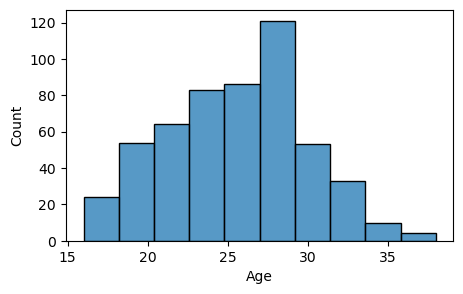

In [9]:
plt.figure(figsize=(5,3))
sns.histplot(data=df,x='Age',bins=10);

*2. Total Goals scored per Club*

In [10]:
# Calculating total goals scored by each club, sorting in descending order, and resetting the index
club_goals = df.groupby("Club").sum()["Goals"].sort_values(ascending=False).reset_index()

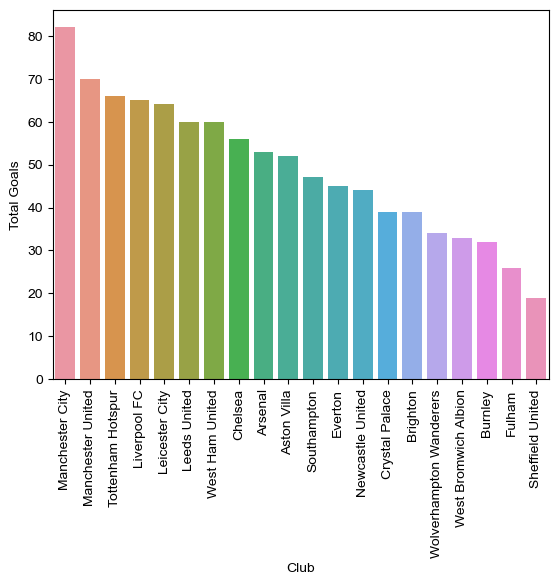

In [11]:
# Creating a bar plot to visualize total goals scored by each club

sns.barplot(data=club_goals, x = "Club", y = "Goals")
sns.set_style(style="darkgrid")
plt.ylabel("Total Goals")
plt.xticks(rotation=90);

**Inference:**
    
Manchester City, Manchester United and Tottenham are the top scoring teams while, Burnley, Fulham and Sheffield United are the list scoring teams.

*3. Top goal scorers for each Clubs*

In [12]:
# Identifying players with the maximum goals scored for each club
idx_max_goals_per_club = df.groupby("Club")["Goals"].idxmax()

# Selecting relevant columns and sorting players by goals scored in descending order
players_with_max_goals_per_club = df.loc[idx_max_goals_per_club, ["Club", "Name", "Goals"]].sort_values("Goals",ascending=False)

#Displaying players with maximum goals scored per club
players_with_max_goals_per_club

,Club,Name,Goals
162,Tottenham Hotspur,Harry Kane,23
81,Liverpool FC,Mohamed Salah,22
51,Manchester United,Bruno Fernandes,18
214,Leeds United,Patrick Bamford,17
237,Everton,Dominic Calvert-Lewin,16
110,Leicester City,Jamie Vardy,15
267,Aston Villa,Ollie Watkins,14
33,Manchester City,İlkay Gündoğan,13
191,Arsenal,Alexandre Lacazette,13
428,Burnley,Chris Wood,12


**Inference:**
    
Harry Kane from Tottenham Hotspur was the highest goal scorer for his club and the league.


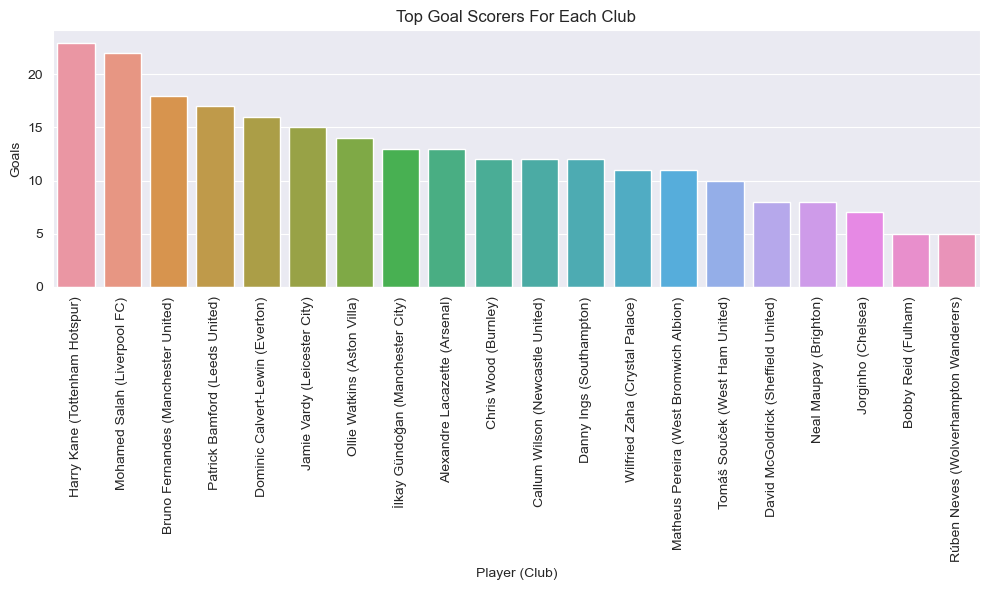

In [13]:


# Combine player names and club names into a single label for plotting
players_with_max_goals_per_club['Player_Club'] = players_with_max_goals_per_club['Name'] + ' ('+ players_with_max_goals_per_club['Club'] + ')'

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=players_with_max_goals_per_club, x="Player_Club", y="Goals")
plt.ylabel("Goals")
plt.xlabel("Player (Club)")
plt.title("Top Goal Scorers For Each Club")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


*4. Top 15 Nationality of players in the league* 

<Axes: >

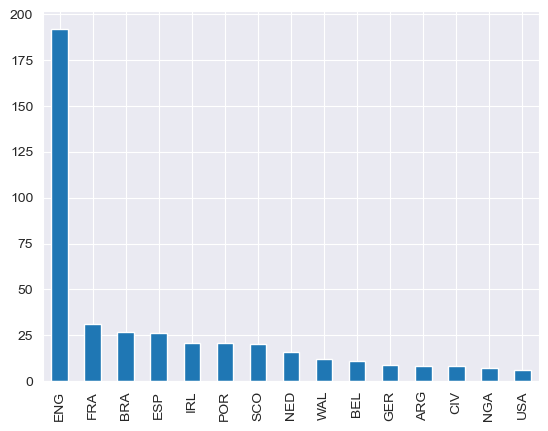

In [14]:
df["Nationality"].value_counts()[:15].plot(kind= "bar")


**Inference:**

England Players Nationals are the most represented while USA Nationals are the least represented in the league

*5. Top Goal scoers for the League*

In [15]:
df.sort_values("Goals", ascending= False)[["Name","Club","Goals"]][:10].reset_index(drop=True)

,Name,Club,Goals
0,Harry Kane,Tottenham Hotspur,23
1,Mohamed Salah,Liverpool FC,22
2,Bruno Fernandes,Manchester United,18
3,Patrick Bamford,Leeds United,17
4,Son Heung-min,Tottenham Hotspur,17
5,Dominic Calvert-Lewin,Everton,16
6,Jamie Vardy,Leicester City,15
7,Ollie Watkins,Aston Villa,14
8,İlkay Gündoğan,Manchester City,13
9,Alexandre Lacazette,Arsenal,13


In [16]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


*6. Club with the most Yellow cards*

In [17]:
club_Yellow_Cards = df.groupby("Club").sum()["Yellow_Cards"].sort_values(ascending=False).reset_index()

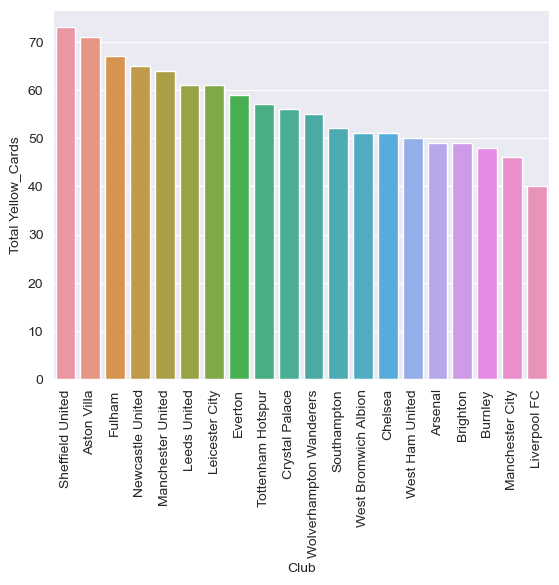

In [18]:
sns.barplot(data=club_Yellow_Cards, x = "Club", y = "Yellow_Cards")
plt.ylabel("Total Yellow_Cards")
plt.xticks(rotation=90);

**Inference:**
    
Sheffied United Club had the most yellow cards

*7. Players with the most scored Penalty Goals*

In [19]:
df.sort_values(by ="Penalty_Goals", ascending= False)[["Name","Club","Penalty_Goals"]][:5].reset_index(drop=True)

,Name,Club,Penalty_Goals
0,Bruno Fernandes,Manchester United,9
1,Jamie Vardy,Leicester City,8
2,Jorginho,Chelsea,7
3,Mohamed Salah,Liverpool FC,6
4,Anwar El Ghazi,Aston Villa,4


## 3. Featuring Engineering with Principal Component Analysis PCA

In [20]:
#Dropping the Name,Club and Nationality columns 
data = df.drop(['Name', 'Club', 'Nationality'], axis=1)

In [21]:
# Convert categorical variable into dummy variables
data = pd.get_dummies(data)

In [22]:
data.head()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,...,Position_DF,"Position_DF,FW","Position_DF,MF",Position_FW,"Position_FW,DF","Position_FW,MF",Position_GK,Position_MF,"Position_MF,DF","Position_MF,FW"
0,21,36,32,2890,6,5,1881,82.3,1,1,...,0,0,0,0,0,0,0,0,0,1
1,28,31,31,2745,0,0,1007,84.6,0,0,...,0,0,0,0,0,0,1,0,0,0
2,24,35,29,2602,6,8,826,77.2,0,0,...,0,0,0,1,0,0,0,0,0,0
3,23,27,27,2286,3,5,1806,78.6,0,0,...,1,0,0,0,0,0,0,0,0,0
4,20,32,25,2373,1,2,1987,85.0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
#import library for standardizing the data
from sklearn.preprocessing import StandardScaler

In [24]:
#create an instance
scaler = StandardScaler()

In [25]:
#Fitting the scaler to the dataset and transforming it
scaled_data = scaler.fit_transform(data)

In [26]:
#Importing PCA (Principal Component Analysis) for dimensionality reduction
from sklearn.decomposition import PCA

In [27]:
# reduce the dimensionality of the data down to 2 principal components
pca_model = PCA(n_components=2)

In [28]:
# Applying PCA transformation to the standardized data
pca_model.fit_transform(scaled_data)

array([[ 3.85418106,  0.97742031],
       [ 0.59507913, -2.00191163],
       [ 3.36734897,  2.25484671],
       ...,
       [-2.84556304,  0.31116589],
       [-2.02417242,  4.01926899],
       [-3.53290782,  0.93130162]])

In [29]:
#stroing the results
pca_results = pca_model.fit_transform(scaled_data)

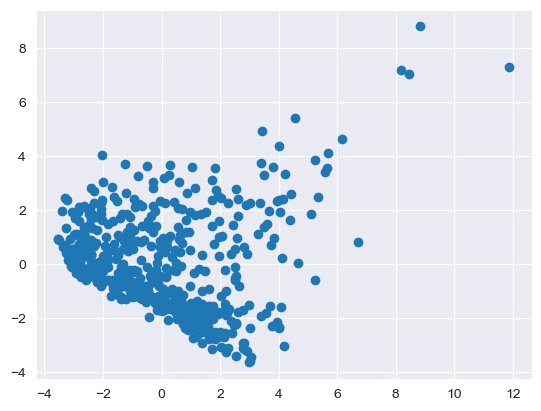

In [30]:
# Plotting the PCA results in a scatter plot
plt.scatter(pca_results[:,0],pca_results[:,1])

In [31]:
#explained variance of each feature in reduced dataframe 
pca_model.explained_variance_ratio_

array([0.21759814, 0.13901024])

In [32]:
#sum of explained variance 
np.sum(pca_model.explained_variance_ratio_)

0.35660837406459195

## 4. KMeans Clustering

In [33]:
# Importing the KMeans clustering library from scikit-learn
from sklearn.cluster import KMeans 

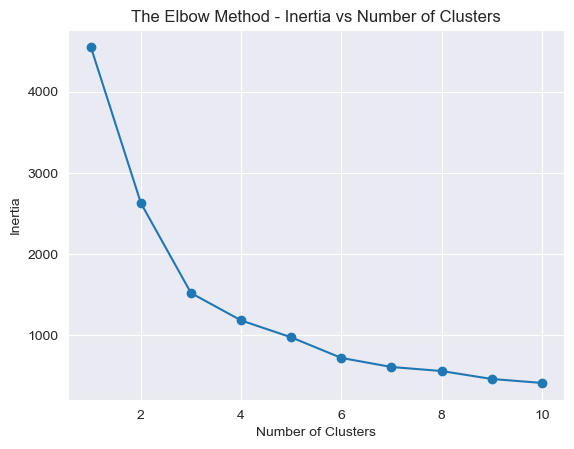

In [34]:
#Implementing the Elbow Method to find the optimal number of clusters

inertia = []

# Iterate over different numbers of clusters
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 21)
    kmeans.fit(pca_results)
    inertia.append(kmeans.inertia_)
    
# Plotting Inertia vs Number of Clusters    
plt.plot(range(1,11), inertia, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method - Inertia vs Number of Clusters')
plt.show()

In [35]:
#Initializing KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3)


In [36]:
# Fitting KMeans clustering to the PCA-transformed data
kmeans.fit(pca_results)

KMeans(n_clusters=3)

In [37]:
# Creating a DataFrame of cluster centers obtained from KMeans clustering
cluster_centres= pd.DataFrame(kmeans.cluster_centers_)
cluster_centres

,0,1
0,-1.812175,0.557272
1,1.227678,-1.693595
2,3.232563,2.539482


In [38]:
# Renaming columns of cluster_centers DataFrame to "x" and "y"
cluster_centres.columns = ["x", "y"]
cluster_centres

,x,y
0,-1.812175,0.557272
1,1.227678,-1.693595
2,3.232563,2.539482


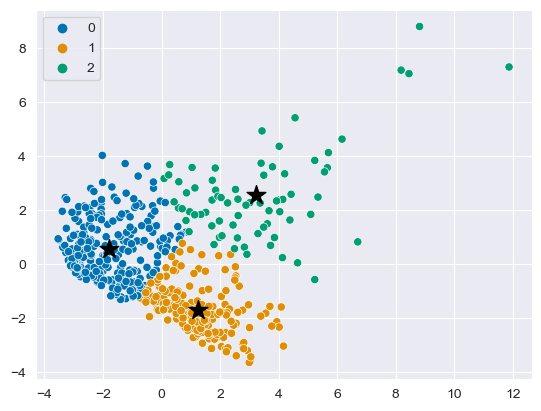

In [39]:
# Visualizing clustered data points with PCA results and cluster centers
sns.scatterplot(data= pca_results, x= pca_results[:,0], y= pca_results[:,1], hue= kmeans.labels_, palette='colorblind')
plt.scatter(x="x", y = "y", data=cluster_centres, s= 200, c = "black", marker= "*")

In [40]:
kmeans.labels_

array([2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1,
       0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1,

In [41]:
# Adding cluster labels to the DataFrame: assigning the labels to a new column in the DataFrame
df['Cluster_labels'] = kmeans.labels_

In [42]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Cluster_labels
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,2
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,1
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,2
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,1
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,1
